# Linear regression


An ordinary linear regression model is of form $y = a + b \cdot X$, where the parameters $a$ and $b=\{b_1,\ldots,b_n\}$ are determined by minimizing the squared residual errors between the model and the training data. In one dimension the parameters take simple forms

$a = \bar{y} - \bar{x}\frac{(\bar{xy}-\bar{x}\bar{y})}{(\bar{x^{2}}-\bar{x}^{2})}$ and $b=\frac{(\bar{xy}-\bar{x}\bar{y})}{(\bar{x^{2}}-\bar{x}^{2})}$,
which we will verify below using a simple model. We then evaluate the performance of the model using several error metrics and compute confidence intervals for the model parameters.

In [4]:
#libraries
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from ipywidgets import interactive
import ipywidgets as widgets

In [19]:
#@title Interactive plot
sns.set()
sns.set_context("talk")


def plot_regression(slope, intercept):
    """
    :param slope: rate of change of y with x
    :param intercept: y(x=0)
    :return: plots a line fitted to some fake data
    """
    # Fixing the seed of the random number generator for reproducibility of the fake data
    np.random.seed(50)
    x = np.arange(1, 101)
    y = 3 * x + 20 + np.random.normal(0, 30, 100)
    y_pred = slope * x + intercept
    mse = np.mean((y-y_pred)**2)
    plt.plot(x, y, "o")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Scatter plot with the regression line")

    # We define two points to construct the line. Every line is defined by two points.
    x1, y1 = 0, intercept
    x2, y2 = 100, intercept + slope * 100
    l1 = [(x1, y1), (x2,y2)]
    
    lc = LineCollection([l1], color=["black"], lw=2)

    plt.gca().add_collection(lc)

    plt.show()
    
    print("The mean squared error (MSE) is: {:.2f} cm2".format(mse))
    print("The root mean square (RMSE) is: {:.2f} cm".format(np.sqrt(mse)))

#interactive_plot = interactive(plot_regression, alpha=(0,30), beta=(-100,100))
interactive_plot = interactive(plot_regression, slope=widgets.FloatSlider(min=0, max=40, step=0.5, value=0),
                               intercept=widgets.FloatSlider(min=0, max=200, step=10, value=200))

interactive_plot

interactive(children=(FloatSlider(value=0.0, description='slope', max=40.0, step=0.5), FloatSlider(value=200.0…

## Obtaining the model parameters with Ordinary Least Squares

Let's verify the equations  for $a$ and $b$ above numerically with python

In [20]:
# Replicating the data
np.random.seed(50)
x = np.arange(1, 101)
y = 3 * x + 20 + np.random.normal(0, 30, 100)

In [21]:
# Slope
b = (np.mean(x*y) - (np.mean(x)*np.mean(y))) / (np.mean(x*x) - np.mean(x)**2)
# Intercept
a = np.mean(y) - np.mean(x)*b

print("The slope of the regression is: {:.2f}".format(b))
print("The intercept of the regression is: {:.2f}".format(a))

The slope of the regression is: 2.92
The intercept of the regression is: 25.11


### Making predictions

In [22]:
# Prediction for new data (drop diameter = 41)
print("The prediction for {} is {:.2f}".format(41,a + b * 41))

The prediction for 41 is 144.94


In [23]:
# Prediction for new data (drop diameter = 20)
print("The prediction for {} is {:.2f}".format(21,a + b * 21))

The prediction for 21 is 86.49


### Evaluating predictions

In [24]:
# Evaluating predictions
y_pred = a + b * x

# Compute:
# ME: mean error
MSE = np.mean(y - y_pred)

# MAE: mean absolute error
MAE = np.mean(np.abs(y - y_pred))

# MSE: mean squared error
MSE = np.mean(np.power(y - y_pred, 2))

# RMSE: root mean squared error
RMSE = np.sqrt(MSE)

# MAPE: mean absolute percentual error
MAPE = np.mean(np.abs(y - y_pred)/y)

Text(0.5, 1.0, 'Residual histogram')

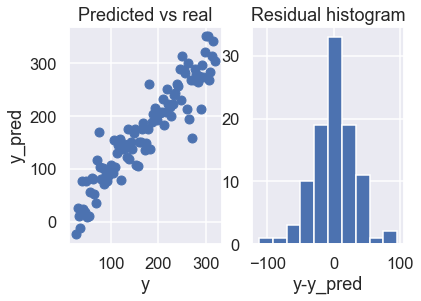

In [25]:
# Scatter plot y_pred vs y
#
# Q: What kind of plot will one obtain if the model predicts the data exactly?
# A: A straight line

fig, ax = plt.subplots(1,2)
ax[0].plot(y_pred, y, 'o')
ax[0].set_xlabel("y")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Predicted vs real")

# Histogram of residuals: y - y_pred
# Do the residual the errors form a normal distribution?
ax[1].hist(y - y_pred)
ax[1].set_xlabel("y-y_pred")
ax[1].set_title("Residual histogram")



### Plotting the linear model with seaborn

In [26]:
data = pd.DataFrame({"x":x, "y":y,"y_pred":y_pred})
data

,x,y,y_pred
0,1,-23.810563,28.036424
1,2,25.070672,30.958945
2,3,10.372147,33.881467
3,4,-11.937415,36.803988
4,5,77.358384,39.726509
...,...,...,...
95,96,268.796797,305.675960
96,97,284.306951,308.598482
97,98,314.158032,311.521003
98,99,342.992746,314.443524


<AxesSubplot:xlabel='y', ylabel='y_pred'>

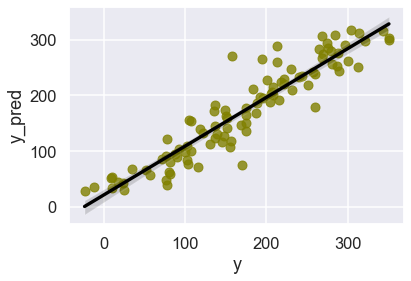

In [27]:
# sns.regplot(x =, y = , data=, scatter_kws ={'color': value}, line_kws={"color": "red"})
sns.regplot(x='y',y='y_pred', data=data, scatter_kws={"color": "olive"}, line_kws={"color": "black"})

## Linear regression with scipy

The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis.

In [28]:
import scipy.stats as stats
# slope, intercept, r_value, p_value, slope_std_err, intercept_std_error = stats.linregress(x,y); where x,y are numpy arrays
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

result = stats.linregress(x,y)

print("The slope of the regression is: {:.2f}".format(result.slope))
print("The intercept of the regression is: {:.2f}".format(result.intercept))

The slope of the regression is: 2.92
The intercept of the regression is: 25.11


### Linear model with Scikit-Learn

In [1]:
from sklearn.linear_model import LinearRegression

In [2]:
# create the model
model = LinearRegression()

In [3]:
x.shape

NameError: name 'x' is not defined

In [ ]:
y.shape

In [33]:
x.reshape(-1,1).shape

(100, 1)

In [34]:
model.fit(x,y)

ValueError: Expected 2D array, got 1D array instead:
array=[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

This is a common error. To fix the issue, we have to reshape the data into a 2-d array in order to use scikit-learn's linear regression

In [35]:
# fit the model
reg = model.fit(x.reshape(-1,1),y.reshape(-1,1))

print("The slope of the regression is: {:.2f}".format(reg.coef_[0][0]))
print("The intercept of the regression is: {:.2f}".format(reg.intercept_[0]))

The slope of the regression is: 2.92
The intercept of the regression is: 25.11


In [36]:
# make predictions
pred = model.predict(np.array([41, 21]).reshape(-1,1))
pred

array([[144.93728112],
       [ 86.4868524 ]])

In [44]:
from sklearn.metrics import r2_score

In [43]:
# The coefficient of determination: 1 is perfect prediction
print("The R2 score is {:.2f}".format(r2_score(y,y_pred)))

The R2 score is 0.87


# Data splitting

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

# Compute again the values of the slope and the intercept.
# How do they compare with the previous values?
reg_new = model.fit(X_train.reshape(-1,1), y_train.reshape(-1,1)) # again we need to reshape the numpy array data for scikit-learn to work

print("The slope of the regression is: {:.2f}".format(reg_new.coef_[0][0]))
print("The intercept of the regression is: {:.2f}".format(reg_new.intercept_[0]))

The slope of the regression is: 2.93
The intercept of the regression is: 24.23


In [40]:
# Now repeat this 100 times and get the corresponding values for the slope and the intercept point estimations!
# Store the resulting values in two lists:

slopes = []
intercepts = []

for i in range(1000):

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

    reg_new = model.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

    slopes.append(reg_new.coef_[0][0])
    intercepts.append(reg_new.intercept_[0])


Text(0.5, 1.0, 'Histogram of intercepts')

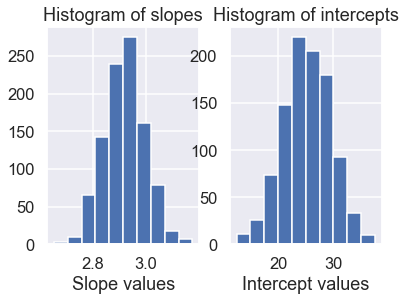

In [41]:
# Plot histograms for the slopes and the intercepts.

fig2, ax2 = plt.subplots(1,2)

ax2[0].hist(slopes)
ax2[0].set_xlabel("Slope values")
ax2[0].set_title("Histogram of slopes")

ax2[1].hist(intercepts)
ax2[1].set_xlabel("Intercept values")
ax2[1].set_title("Histogram of intercepts")


# Confidence intervals

Every sample for the training set we will produce another set of predicted regression coefficient. Therefore, we can ask ourselves to have a $(1-\alpha)100\%$ confidence interval for those coefficients. If we set

$$\hat{y}_{i}=\hat{b}_{0}+\hat{b}_{1}x_{i}$$

A confidence interval for each coefficient can be computed as:

$$\hat{b}_{1} \pm t_{\alpha /2,n-p}\times \sqrt{\frac{MSE}{\sum_{i}(x_{i}-\bar{x})^{2}}}$$

and 

$$\hat{b}_{0} \pm t_{\alpha /2,n - p} \times \sqrt{\frac{MSE}{n}},$$ where $MSE$ is mean squared error $\sum_{i=1}^n \frac{(y-\hat y)^2}{n-2}$ and $t$ is the $t$-distribution.

For reference see [link](https://online.stat.psu.edu/stat415/lesson/7/7.5)

In [42]:
# Compute the confidence intervals for the slope and the intercept
# stats.t.ppf(1-(alpha/2),df=n-2)

tc = stats.t.ppf(1-(0.05/2),df=x.shape[0]-2) # 95% confidence

c1 =  np.sqrt( MSE / np.sum( np.power( x - np.mean(x), 2) ) )
c2 = np.sqrt( MSE / x.shape[0] )

print("The confidence interval for the slope is [{:.2f}, {:.2f}]".format(b - tc * c1, b + tc * c1))
print("The confidence interval for the intercept is [{:.2f}, {:.2f}]".format(a - tc * c2, a + tc * c2))

The confidence interval for the slope is [2.70, 3.14]
The confidence interval for the intercept is [18.72, 31.51]
